In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import kaggle
import zipfile

In [111]:
!kaggle datasets download -d leonardopena/top50spotify2019

top50spotify2019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
zipfile_name = 'top50spotify2019.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [113]:
# will remove the "Unnamed: 0" column as it doesn't provide any meanigful information
# re format column names and provide some standardisation
# will check data types of each column and for missing values
df = pd.read_csv("top50.csv", encoding='latin-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [114]:
df.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [115]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.isnull().sum()

Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [116]:
print(df.columns)

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')


In [117]:
df = df.rename(columns={'Track.Name': 'Song_Title', 'Artist.Name': 'Artist', 'Beats.Per.Minute': 'BPM',
                        'Loudness..dB..': 'Decibel(dB)', 'Valence.': 'Valence', 'Length.': 'Length',
                         'Acousticness..': 'Acousticness', 'Speechiness.': 'Speechiness'})
print(df.columns)

Index(['Song_Title', 'Artist', 'Genre', 'BPM', 'Energy', 'Danceability',
       'Decibel(dB)', 'Liveness', 'Valence', 'Length', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')


In [118]:
df.nunique()

Song_Title      50
Artist          38
Genre           21
BPM             31
Energy          31
Danceability    29
Decibel(dB)      9
Liveness        22
Valence         39
Length          44
Acousticness    35
Speechiness     24
Popularity      18
dtype: int64

# BPM and Energy

<Axes: ylabel='Frequency'>

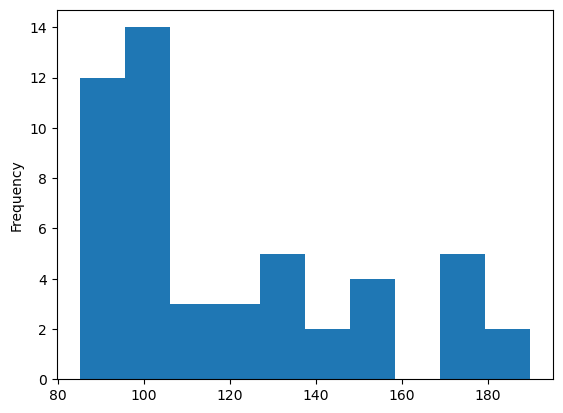

In [119]:
# frequency of bpm histogram
df['BPM'].plot.hist()

In [120]:
bpm_stats = df['BPM'].describe()
print(bpm_stats)

count     50.000000
mean     120.060000
std       30.898392
min       85.000000
25%       96.000000
50%      104.500000
75%      137.500000
max      190.000000
Name: BPM, dtype: float64


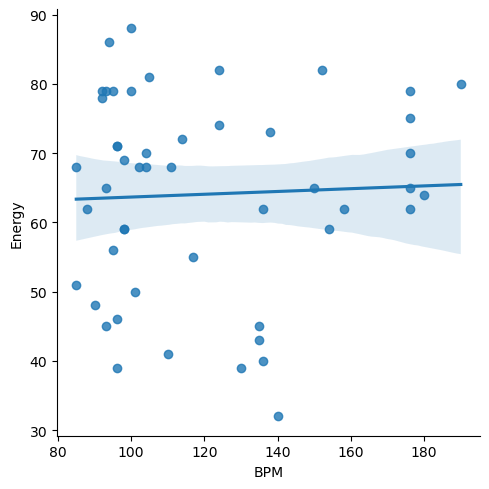

In [121]:
# relation between eneregy and BPM
x_variable = 'BPM'
y_variable = 'Energy'
sns.lmplot(x=x_variable, y=y_variable, data=df)
plt.show()

# Decibel(dB) and Energy

<Axes: ylabel='Frequency'>

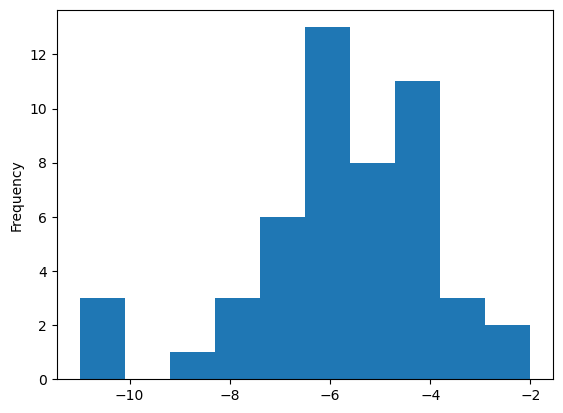

In [122]:
df['Decibel(dB)'].plot.hist()

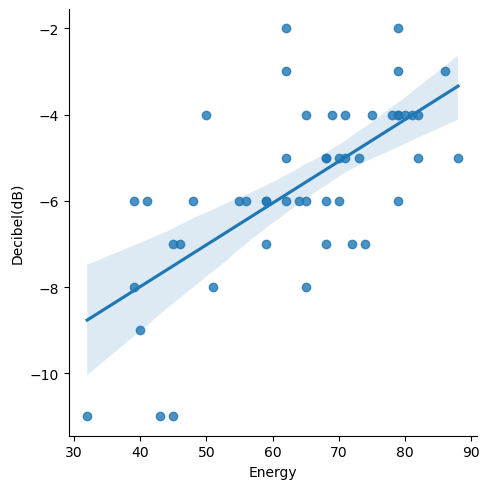

In [123]:
# relation between Decibel and Energy
x_variable = 'Energy'
y_variable = 'Decibel(dB)'
sns.lmplot(x=x_variable, y=y_variable, data=df)
plt.show()

# Artist popularity

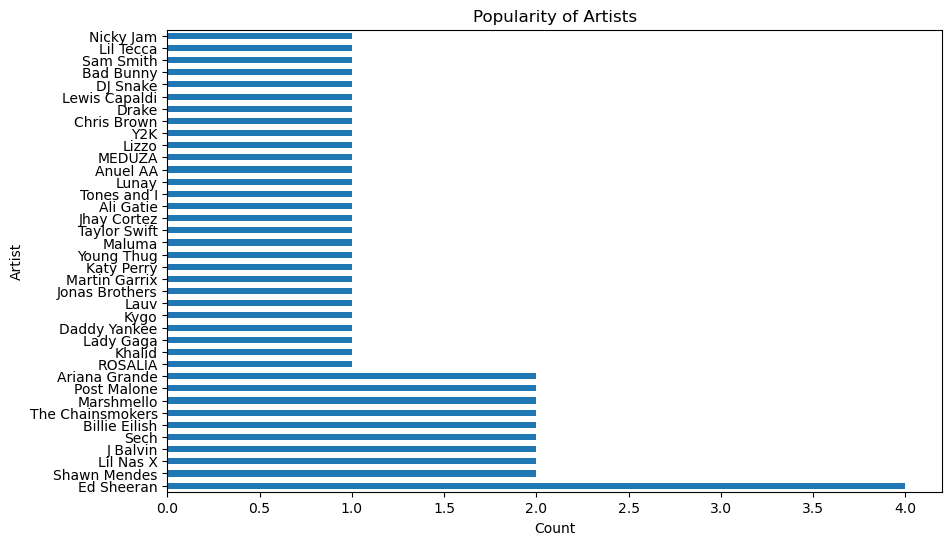

In [124]:
plt.figure(figsize=(10, 6))
df['Artist'].value_counts().plot(kind='barh')
plt.title('Popularity of Artists')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.xticks(rotation=0)
plt.show()


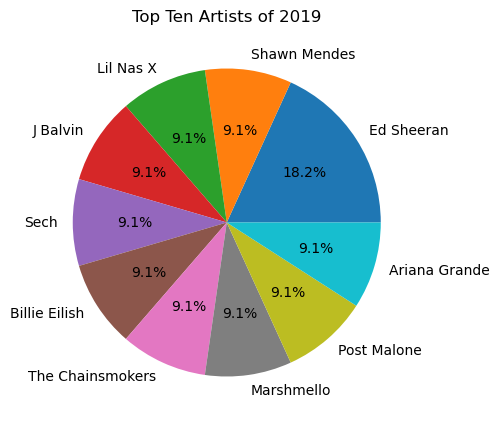

In [125]:
top_ten_artists = df['Artist'].value_counts().nlargest(10)
plt.figure(figsize=(5, 5))
plt.pie(top_ten_artists, labels=top_ten_artists.index, autopct='%1.1f%%')
plt.title('Top Ten Artists of 2019')
plt.show()

# Genre popularity

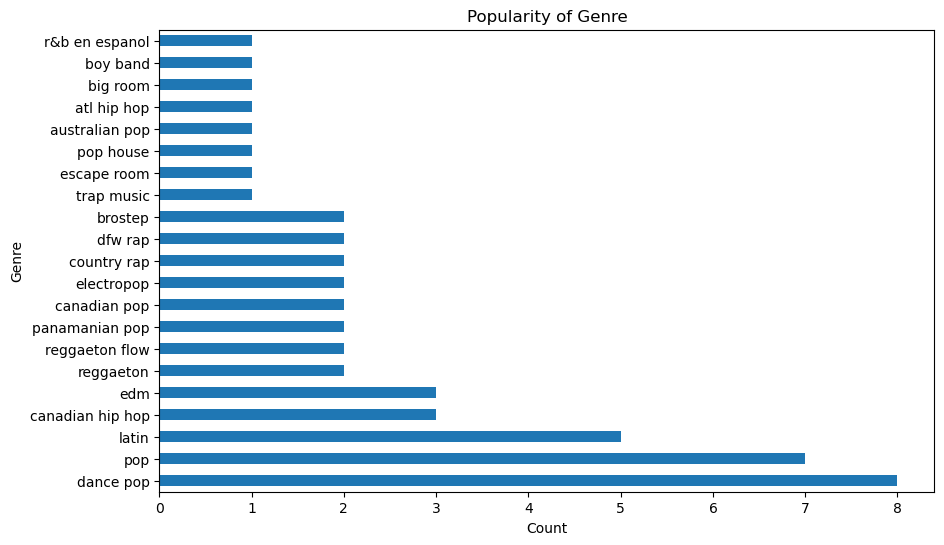

In [126]:
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().plot(kind='barh')
plt.title('Popularity of Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.xticks(rotation=0)
plt.show()

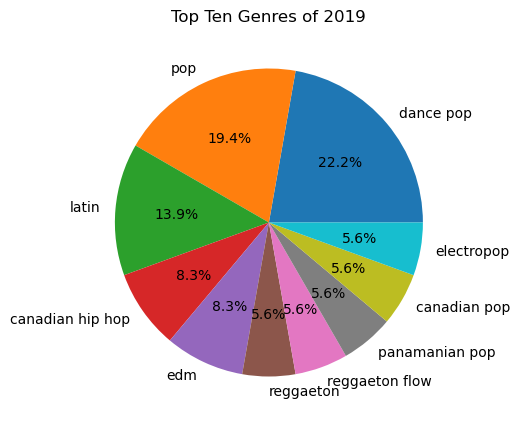

In [127]:
top_ten_genres = df['Genre'].value_counts().nlargest(10)
plt.figure(figsize=(5, 5))
plt.pie(top_ten_genres, labels=top_ten_genres.index, autopct='%1.1f%%')
plt.title('Top Ten Genres of 2019')
plt.show()